# Gaussian Mixture Models


### What is a gaussian?

A Gaussian is the same as the normal distribution. That is, it has a bell-shape curve with symmetrical distribution of data points to both sides. A gaussian distribution has a center peak which is denoted as mean, and the distribution function can vary from standard deviation steps to the left (negative SD) and to the right (positive SD). The SD defines how spread is the data.  


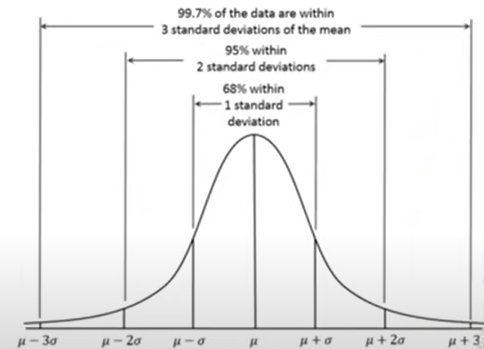


As such, the formula of the probability distribution function is the same of the normal distribution:


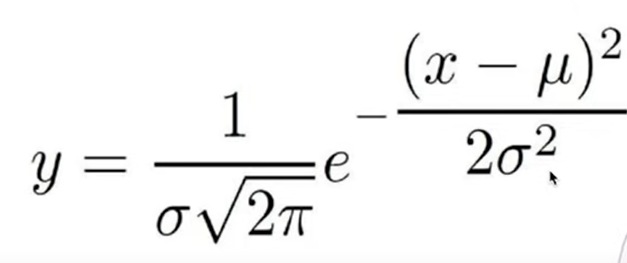



### Gaussian mixture model

#### How do Gaussian Mixture Models are implemented?

A Gaussian mixture model is a **probabilistic** model that assumes all the data points are generated from a mixture of a finite number of **Gaussian (normal) distributions** with unknown parameters. That is, the data points can have multiple peaks (means) and standard deviations.



For d dimensions, the Gaussian distribution of a vector x = (x^1, x^2,... x^d)^T is defined by:


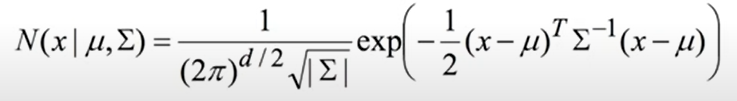


In the formula, we use mean as usual, but instead of using the Standard Deviation, we use the **Covariance Matrix**, which is the measure of how one variable (X1) variance is associated with a second variable (X2):



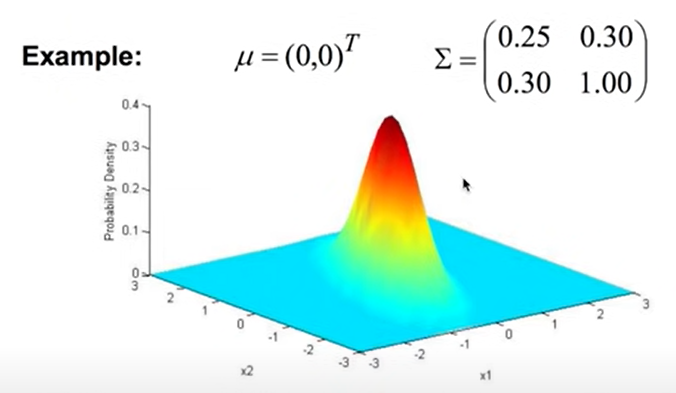


* So the probability given in a mixture of K Gaussians is:

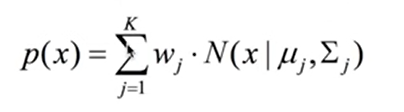


where w_j is the prior probability (weight) of the j_th Gaussian, and: 

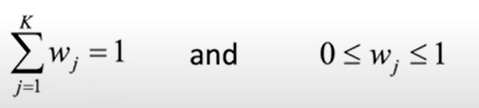


### Relation to K-means algorithm

One can think of mixture models as **generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the Gaussians**.

However, the K-means "hardly" assigns the data points to clusters given a centroid pre-defined, and the Gaussian Mixture Models "soflty" assigns the data points based on probabilities of pertaining to one given group or another. 

Mathematically: 

**K-means** find k to minimize RSS (x - x_mean)^2

**Gaussian Mixture** find k to minimize (x - x_mean)^2 / sigma^2

The difference is that the Gaussian Mixture takes the **variance into consideration** when it calculates the measurement taking the "weighted" average, while Kmeans only calculates conventional Euclidian distances. 



### Optimization of the algorithm 

The **Gaussian Mixture** implements **Expectation-Maximization** (EM) algorithm for fitting the model to maximize the likelihood. It draws confidence ellipsoides for multivariate models, and compute the **Bayesian information Criterion** to assess the number of clusters in the data. 

**Expectation**: Takes a random data (hidden variable) point from the dataset and draws a gaussian distribution around it. Calculates the parameters of the model (mean and covariance matrix) and find the posterior probabilities of the variable being assigned to one specific group given current parameter values. Then the algorithm calculates the maximum likelihood. 

**Maximization**: The parameters are reestimated given these posterior probabilities to calculate another maximum likelihood. The process is repeated to maximize likelihood until the maximum likehood estimate is stable between repetitions / converged.



The GaussianMixture model in python comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.



## Implementing

Based on https://www.youtube.com/watch?v=WsGNJYCxwNM&ab_channel=ChelseaPelleriti

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from plotnine import *

In [5]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                 sep = "\t")

In [6]:
bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


In [14]:
features = ["Calories", "Sodium(mg)"]
X = bk[features]
X

,Calories,Sodium(mg)
0,260,490
1,300,710
2,360,520
3,450,960
4,410,740
...,...,...
117,90,125
118,160,150
119,350,290
120,400,330


In [15]:
#standardize the features
z = StandardScaler() #instantiate standard scaler
X[features] = z.fit_transform(X) #if you do not index the assigning object you get a np.array instead of df with column names

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [16]:
X

,Calories,Sodium(mg)
0,-0.835829,-0.801337
1,-0.661780,-0.390175
2,-0.400706,-0.745269
3,-0.009095,0.077055
4,-0.183144,-0.334107
...,...,...
117,-1.575539,-1.483492
118,-1.270953,-1.436769
119,-0.444218,-1.175120
120,-0.226657,-1.100364


In [19]:
#create gaussian mixture model; EM for expectation - maximization algorithm
EM = GaussianMixture(n_components = 3) #n_components number of mixture components; you can predefine any number of clusters you want to find
EM.fit(X)

GaussianMixture(n_components=3)

In [25]:
cluster = EM.predict(X) #hard assign classes to clusters
cluster

array([0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
np.round(EM.predict_proba(X), 3) #get the probabilities of class assignments => REMEMBER, GAUSSIAN MIXTURES ASSIGNS TO CLUSTERS BASED ON PROBABILITIES

array([[0.559, 0.43 , 0.011],
       [0.969, 0.004, 0.027],
       [0.488, 0.499, 0.013],
       [0.918, 0.   , 0.082],
       [0.935, 0.022, 0.044],
       [0.809, 0.171, 0.02 ],
       [0.968, 0.   , 0.032],
       [0.781, 0.   , 0.219],
       [0.492, 0.   , 0.508],
       [0.001, 0.   , 0.999],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.009, 0.006, 0.985],
       [0.003, 0.   , 0.997],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.003, 0.   , 0.997],
       [0.88 , 0.   , 0.12 ],
       [0.946, 0.   , 0.054],
       [0.   , 0.   , 1.   ],
       [0.327, 0.   , 0.673],
       [0.13 , 0.   , 0.87 ],
       [0.897, 0.   , 0.103],
       [0.005, 0.   , 0.995],
       [0.02 , 0.   , 0.98 ],
       [0.476, 0.   , 0.524],
       [0.894, 0.012, 0.094],
       [0.962, 0.014, 0.024],
       [0.072, 0.926, 0.002],
       [0.192, 0.804, 0.004],
       [0.422, 0.571, 0.008],
       [0.

In [28]:
X["Cluster"] = cluster #incorporate cluster assignments to the X dataframe
X.head()

C:\Users\davil\AppData\Local\Temp/ipykernel_8696/3894897223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = cluster #incorporate cluster assignments to the X dataframe


,Calories,Sodium(mg),Cluster
0,-0.835829,-0.801337,0
1,-0.661780,-0.390175,0
2,-0.400706,-0.745269,1
3,-0.009095,0.077055,0
4,-0.183144,-0.334107,0


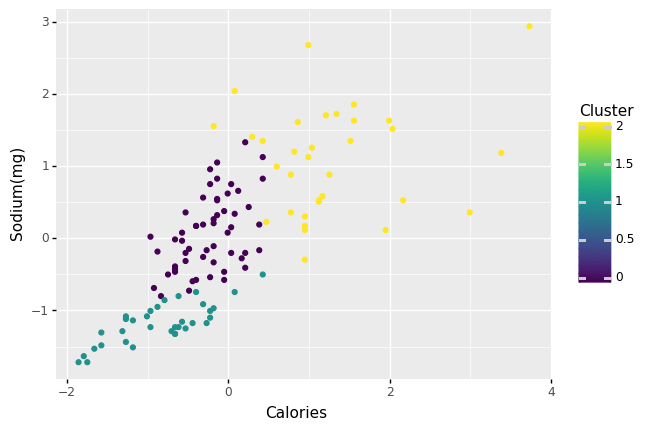

<ggplot: (184890611845)>

In [36]:
#plot using ggplot from plotnine
ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = "Cluster")) + geom_point()
## note that the clusterings are not much sphericals but have different shapes

In [ ]:
#plot using matplotlib
plt.figure(figsize = (10,7))
plt.scatter(x = X["Calories"], y = X["Sodium(mg)"], c = X.Cluster)
plt.ylabel("Sodium(mg)")
plt.xlabel("Calories")

## How to put legends representing each point cluster assignement?

## Multiple dimensions

In [63]:
features = ["Sugar(g)", "Protein(g)", "Fat(g)"]

X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
X

,Sugar(g),Protein(g),Fat(g)
0,-0.326804,-0.370060,-0.919796
1,-0.326804,-0.145073,-0.670844
2,-0.326804,0.304900,-0.421892
3,-0.326804,0.604882,0.076012
4,-0.326804,0.454891,-0.172940
...,...,...,...
117,0.166434,-0.670042,-1.542176
118,1.235119,-0.745038,-1.386581
119,3.125868,-0.745038,-0.857558
120,3.947933,-0.745038,-0.857558


In [66]:
EM = GaussianMixture(n_components = 3) #you can predefine any number of clusters you want to find
EM.fit(X)

GaussianMixture(n_components=3)

In [68]:
cluster = EM.predict(X)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [69]:
EM.predict_proba(X) # get probabilities of class assignments

array([[9.99999415e-001, 5.85130020e-007, 6.61610659e-023],
       [9.99999998e-001, 2.08090892e-009, 9.54619426e-019],
       [1.00000000e+000, 5.65851237e-017, 8.26491593e-024],
       [1.00000000e+000, 4.07225869e-021, 1.10138989e-010],
       [1.00000000e+000, 5.71032883e-019, 1.54584050e-016],
       [9.99999739e-001, 2.60794614e-007, 2.28985615e-017],
       [1.00000000e+000, 1.78783299e-011, 3.23093253e-018],
       [1.00000000e+000, 1.86268166e-029, 2.94114465e-014],
       [9.75402027e-001, 7.97298032e-025, 2.45979727e-002],
       [1.46256290e-001, 4.75716633e-051, 8.53743710e-001],
       [1.10827980e-003, 1.44028577e-095, 9.98891720e-001],
       [2.42696410e-006, 3.48854951e-138, 9.99997573e-001],
       [4.20932548e-001, 3.88876052e-018, 5.79067452e-001],
       [4.83532124e-001, 7.84132485e-021, 5.16467876e-001],
       [2.97697682e-002, 2.05227689e-058, 9.70230232e-001],
       [1.05952940e-002, 3.90622426e-066, 9.89404706e-001],
       [1.05599883e-005, 4.20067008e-125

In [71]:
X["Cluster"] = cluster #assign clusters predicted to the X dataframe
X.head()

C:\Users\davil\AppData\Local\Temp/ipykernel_8696/2100753167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Sugar(g),Protein(g),Fat(g),Cluster
0,-0.326804,-0.370060,-0.919796,0
1,-0.326804,-0.145073,-0.670844,0
2,-0.326804,0.304900,-0.421892,0
3,-0.326804,0.604882,0.076012,0
4,-0.326804,0.454891,-0.172940,0


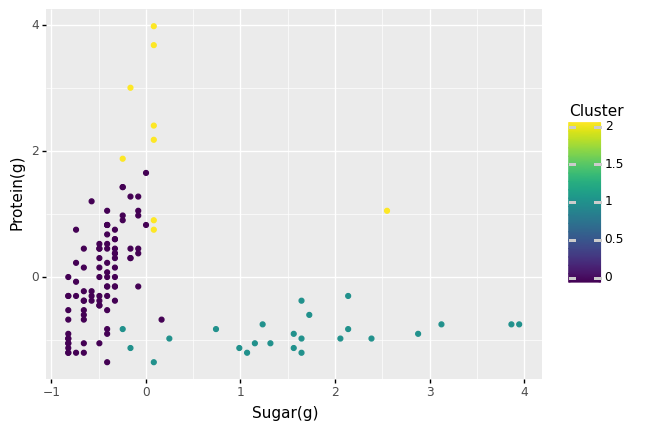

<ggplot: (184894320394)>

In [72]:
#plotting higher dimensional features is harder, then you can plot each combination of features at once
ggplot(X, aes(x = "Sugar(g)", y = "Protein(g)", color = "Cluster")) + geom_point()

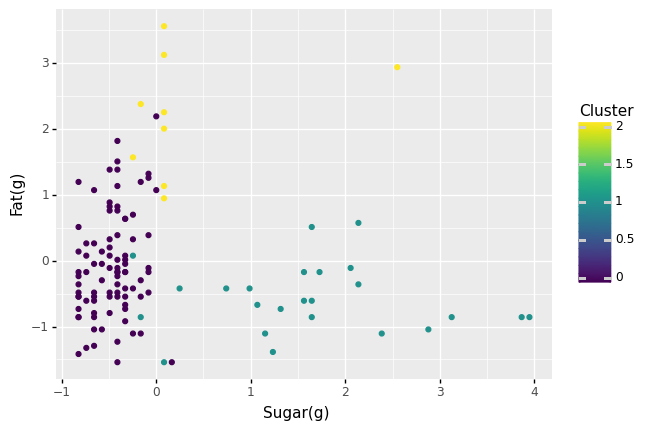

<ggplot: (184894346915)>

In [73]:
ggplot(X, aes(x = "Sugar(g)", y = "Fat(g)", color = "Cluster")) + geom_point()

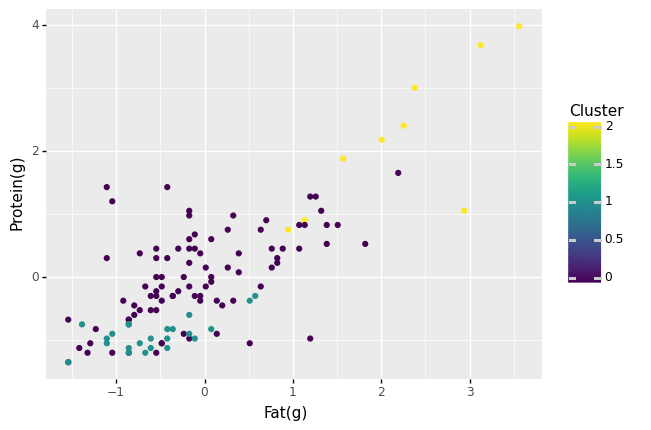

<ggplot: (184894356309)>

In [74]:
ggplot(X, aes(x = "Fat(g)", y = "Protein(g)", color = "Cluster")) + geom_point()